In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units

import sys
sys.path.append('../../') # lets us import ptype package from the subdir

import sounding_utils
from sounding_utils import open_ds_dkimpara, filter_latlon
from importlib import reload

from functools import partial
import cartopy.crs as ccrs

#import ptype.

## Select forecast hour:

In [2]:
hour = '0000'

In [3]:
model='rap'
rap = open_ds_dkimpara(hour,model)

In [4]:
model='hrrr'
hrrr = open_ds_dkimpara(hour,model)

In [5]:
model='gfs'
gfs = open_ds_dkimpara(hour,model)


In [6]:
datasets = [gfs, hrrr, rap]

In [7]:
bbox = {"lon_min": max([ds.longitude.min() for ds in datasets]),
        "lon_max": min([ds.longitude.max() for ds in datasets]),
        "lat_min": max([ds.latitude.min() for ds in datasets]),
        "lat_max": min([ds.latitude.max() for ds in datasets])
       }

In [8]:
[v.values for v in bbox]

{'lon_min': <xarray.DataArray 'longitude' ()>
dask.array<_nanmin_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lon_max': <xarray.DataArray 'longitude' ()>
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lat_min': <xarray.DataArray 'latitude' ()>
dask.array<_nanmin_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lat_max': <xarray.DataArray 'latitude' ()>
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>}


In [9]:
from joblib import dump, load

In [10]:
dump(bbox, 'bbox_dict')

['bbox_dict']

In [11]:
bload = load('bbox_dict')
print(bload)

{'lon_min': <xarray.DataArray 'longitude' ()>
dask.array<_nanmin_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lon_max': <xarray.DataArray 'longitude' ()>
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lat_min': <xarray.DataArray 'latitude' ()>
dask.array<_nanmin_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>, 'lat_max': <xarray.DataArray 'latitude' ()>
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>}


In [13]:
[b.values for k,b in bload.items()]

[array(225.90453, dtype=float32),
 array(299.0828, dtype=float32),
 array(21.138123, dtype=float32),
 array(52.615654, dtype=float32)]

In [16]:
def filter(ds):
    bbox = load('bbox_dict')

    mask = (
            (ds.latitude <= bbox['lat_max']) &
            (ds.latitude >= bbox['lat_min']) &
            (ds.longitude <= bbox['lon_max']) &
            (ds.longitude >= bbox['lon_min'])
           )
    
    return ds.where(mask)


In [17]:
datasets_filter = [filter(ds) for ds in datasets]

In [23]:
datasets_filter[0].t_h.mean(dim='time')

<xarray.DataArray 't_h' (heightAboveGround: 21, y: 721, x: 1440)>
dask.array<mean_agg-aggregate, shape=(21, 721, 1440), dtype=float32, chunksize=(21, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * heightAboveGround  (heightAboveGround) int64 0 250 500 ... 4500 4750 5000
    latitude           (y) float32 dask.array<chunksize=(721,), meta=np.ndarray>
    longitude          (x) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
Dimensions without coordinates: y, x

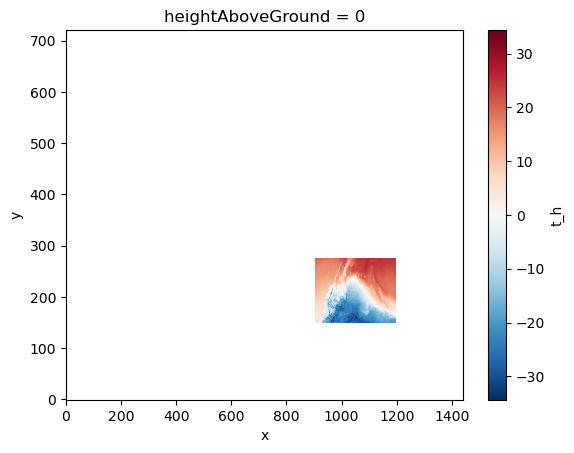

In [29]:
p = datasets_filter[0].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


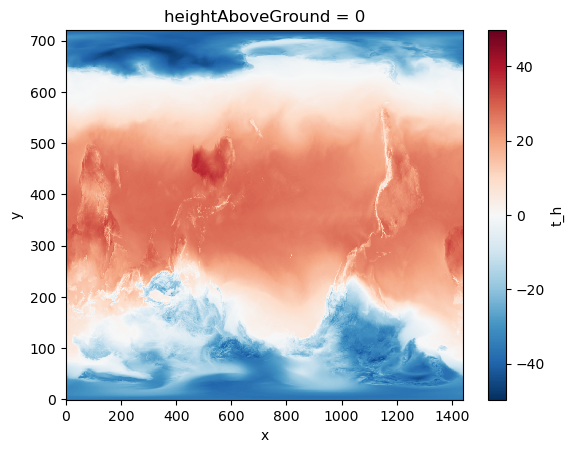

In [31]:
p = datasets[0].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


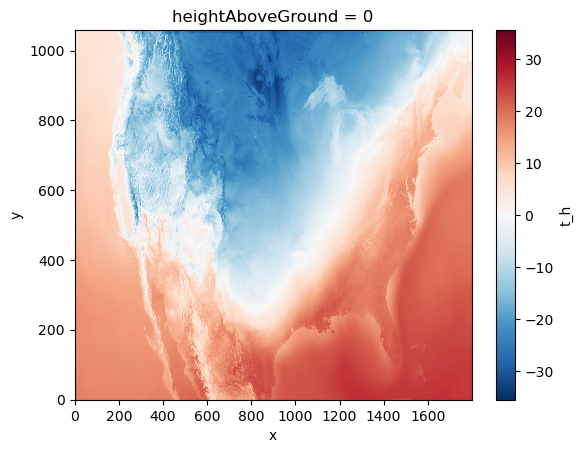

In [28]:
p = datasets_filter[1].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


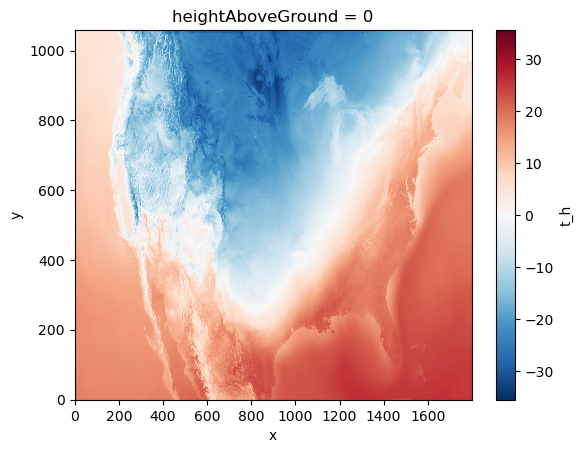

In [30]:
p = datasets[1].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


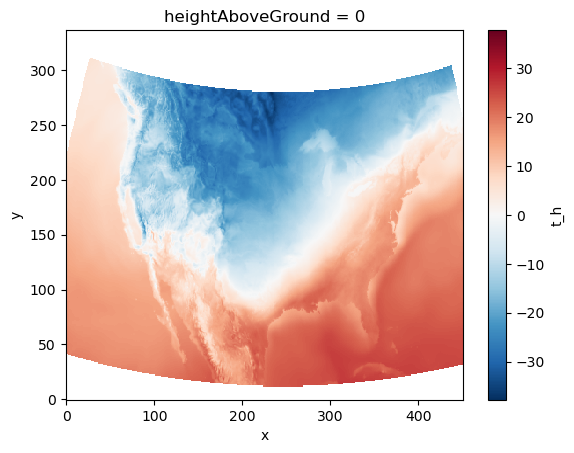

In [27]:
p = datasets_filter[2].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


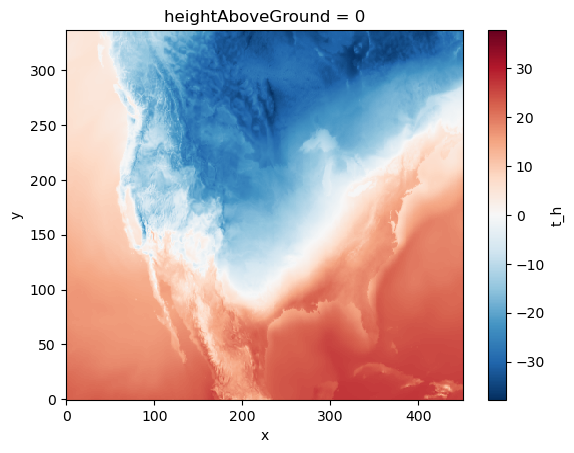

In [33]:
p = datasets[2].t_h.isel(heightAboveGround=0).mean(dim='time').plot.pcolormesh()


In [ ]:
reload(sounding_utils)

ds_filtered = [sounding_utils.filter_latlon(ds, bbox) for ds in datasets]

gfs


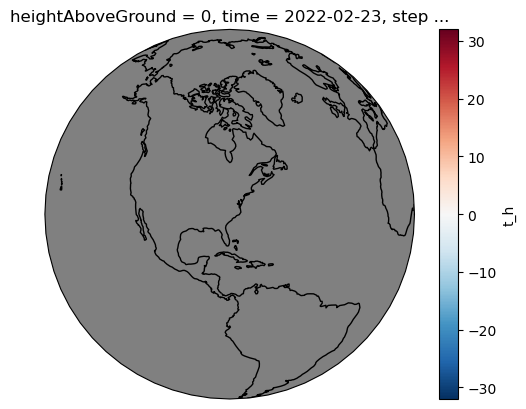

In [77]:

ds = ds_filtered[0]
print(ds.attrs['nwp'])
p = ds.t_h.isel({'time':0,'heightAboveGround':0}).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree()
)

p.axes.set_global()

p.axes.coastlines()

In [78]:
ds

<xarray.Dataset>
Dimensions:            (time: 18, heightAboveGround: 21, y: 721, x: 1440,
                        isobaricInhPa: 33)
Coordinates:
  * heightAboveGround  (heightAboveGround) int64 0 250 500 ... 4500 4750 5000
  * isobaricInhPa      (isobaricInhPa) float32 1e+03 975.0 950.0 ... 3.0 2.0 1.0
    latitude           (y) float32 dask.array<chunksize=(721,), meta=np.ndarray>
    longitude          (x) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
  * time               (time) datetime64[ns] 2022-02-23 ... 2022-02-23
    step               (time) timedelta64[ns] 01:00:00 02:00:00 ... 18:00:00
    valid_time         (time) datetime64[ns] 2022-02-23T01:00:00 ... 2022-02-...
Dimensions without coordinates: y, x
Data variables: (12/29)
    t_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    dpt_h              (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    u_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    v_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    isobaricInhPa_h    (time, heightAboveGround, y, x) float64 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    t                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 33, 721, 1440), meta=np.ndarray>
    ...                 ...
    ML_snow            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_csnow           (time, y, x) float64 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_icep            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_cicep           (time, y, x) float64 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_frzr            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_cfrzr           (time, y, x) float64 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    nwp:      gfs

In [10]:
reload(sounding_utils)
plot_func = partial(sounding_utils.composites_multiplot,
                    datasets = [gfs],
                    x_col = 't_h',
                    colors = ['blue', 'orange'],
                    markers = ['o','v', '+'],
                    plot_median=False)

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': 'Mean Interpolated t_h'}, xlabel='t_h', ylabel='Height above ground (m)'>)

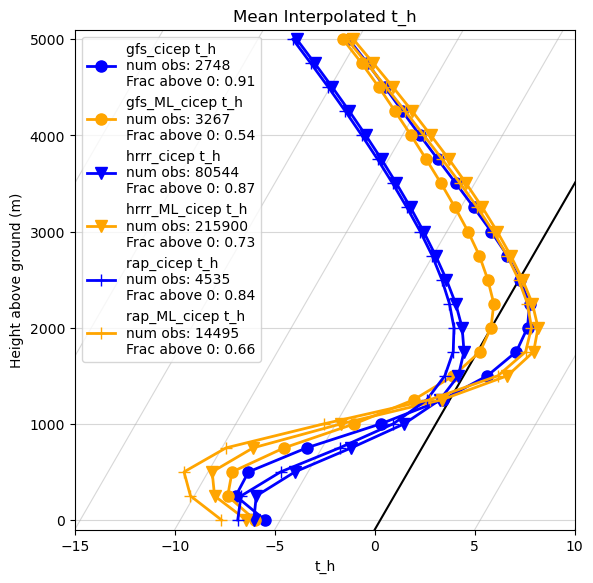

In [11]:
plot_func(cols=['cicep','ML_cicep'],xhighlim=10,xlowlim=-15)

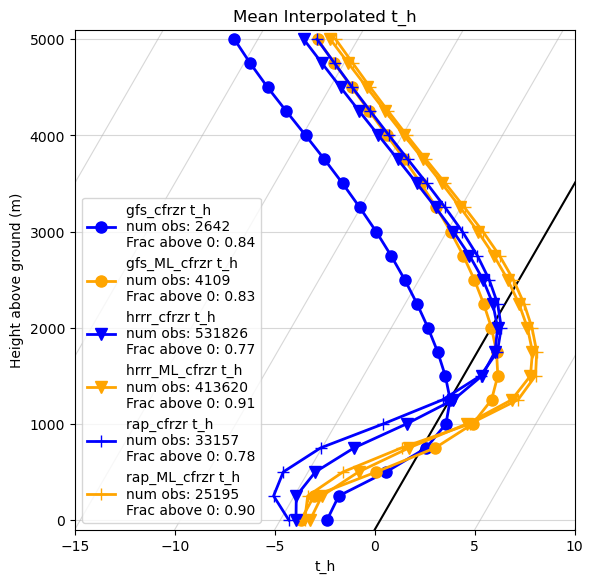

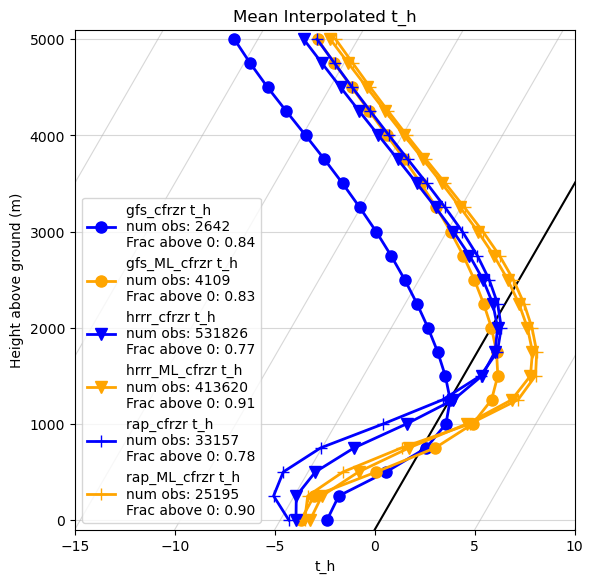

In [12]:
fig,ax=plot_func(cols=['cfrzr', 'ML_cfrzr'])
ax.set_xlim((-15,10))
fig

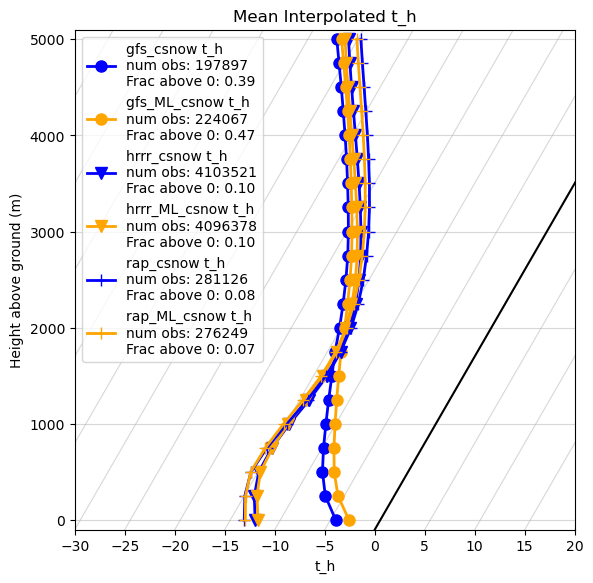

In [13]:
figS,axS = plot_func(cols=['csnow', 'ML_csnow'],xlowlim=-30)

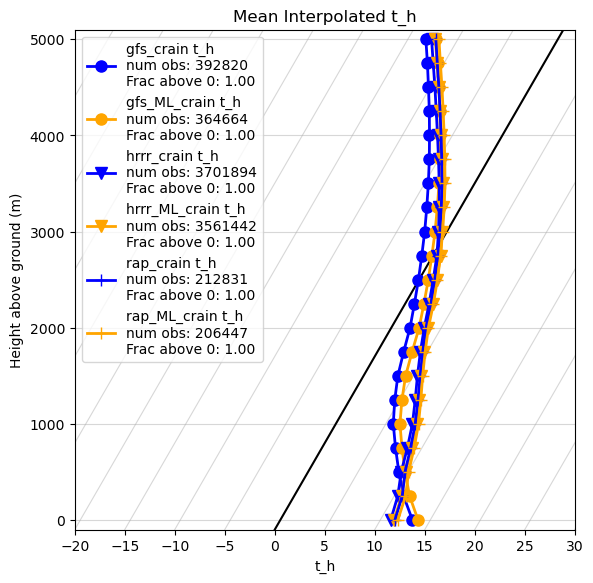

In [14]:

figR, axR = plot_func(cols=['crain', 'ML_crain'],xhighlim=30)

In [15]:
gfs

<xarray.Dataset>
Dimensions:            (time: 18, heightAboveGround: 21, y: 721, x: 1440,
                        isobaricInhPa: 33)
Coordinates:
  * heightAboveGround  (heightAboveGround) int64 0 250 500 ... 4500 4750 5000
  * isobaricInhPa      (isobaricInhPa) float32 1e+03 975.0 950.0 ... 3.0 2.0 1.0
    latitude           (y) float32 dask.array<chunksize=(721,), meta=np.ndarray>
    longitude          (x) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
  * time               (time) datetime64[ns] 2022-02-23 ... 2022-02-23
    step               (time) timedelta64[ns] 01:00:00 02:00:00 ... 18:00:00
    valid_time         (time) datetime64[ns] 2022-02-23T01:00:00 ... 2022-02-...
Dimensions without coordinates: y, x
Data variables: (12/29)
    t_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    dpt_h              (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    u_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    v_h                (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    isobaricInhPa_h    (time, heightAboveGround, y, x) float64 dask.array<chunksize=(1, 21, 721, 1440), meta=np.ndarray>
    t                  (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 33, 721, 1440), meta=np.ndarray>
    ...                 ...
    ML_snow            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_csnow           (time, y, x) uint8 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_icep            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_cicep           (time, y, x) uint8 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_frzr            (time, y, x) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ML_cfrzr           (time, y, x) uint8 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    nwp:      gfs

In [16]:
hrrr

<xarray.Dataset>
Dimensions:                  (time: 18, heightAboveGround: 21, y: 1059,
                              x: 1799, isobaricInhPa: 40)
Coordinates:
  * heightAboveGround        (heightAboveGround) int64 0 250 500 ... 4750 5000
  * time                     (time) datetime64[ns] 2022-02-23 ... 2022-02-23
    step                     (time) timedelta64[ns] 01:00:00 ... 18:00:00
  * isobaricInhPa            (isobaricInhPa) float32 1.013e+03 1e+03 ... 50.0
    latitude                 (y, x) float32 dask.array<chunksize=(1059, 1799), meta=np.ndarray>
    longitude                (y, x) float32 dask.array<chunksize=(1059, 1799), meta=np.ndarray>
    valid_time               (time) datetime64[ns] 2022-02-23T01:00:00 ... 20...
    y_projection_coordinate  (y) float32 dask.array<chunksize=(1059,), meta=np.ndarray>
    x_projection_coordinate  (x) float32 dask.array<chunksize=(1799,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/28)
    t_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 1059, 1799), meta=np.ndarray>
    dpt_h                    (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 1059, 1799), meta=np.ndarray>
    u_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 1059, 1799), meta=np.ndarray>
    v_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 1059, 1799), meta=np.ndarray>
    isobaricInhPa_h          (time, heightAboveGround, y, x) float64 dask.array<chunksize=(1, 21, 1059, 1799), meta=np.ndarray>
    t                        (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 40, 1059, 1799), meta=np.ndarray>
    ...                       ...
    ML_snow                  (time, y, x) float32 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
    ML_csnow                 (time, y, x) uint8 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
    ML_icep                  (time, y, x) float32 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
    ML_cicep                 (time, y, x) uint8 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
    ML_frzr                  (time, y, x) float32 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
    ML_cfrzr                 (time, y, x) uint8 dask.array<chunksize=(1, 1059, 1799), meta=np.ndarray>
Attributes:
    nwp:      hrrr

In [17]:
rap

<xarray.Dataset>
Dimensions:                  (time: 18, heightAboveGround: 21, y: 337, x: 451,
                              isobaricInhPa: 37)
Coordinates:
  * heightAboveGround        (heightAboveGround) int64 0 250 500 ... 4750 5000
  * time                     (time) datetime64[ns] 2022-02-23 ... 2022-02-23
    step                     (time) timedelta64[ns] 01:00:00 ... 18:00:00
  * isobaricInhPa            (isobaricInhPa) float32 1e+03 975.0 ... 125.0 100.0
    latitude                 (y, x) float32 dask.array<chunksize=(337, 451), meta=np.ndarray>
    longitude                (y, x) float32 dask.array<chunksize=(337, 451), meta=np.ndarray>
    valid_time               (time) datetime64[ns] 2022-02-23T01:00:00 ... 20...
    y_projection_coordinate  (y) float32 dask.array<chunksize=(337,), meta=np.ndarray>
    x_projection_coordinate  (x) float32 dask.array<chunksize=(451,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/29)
    t_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    dpt_h                    (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    u_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    v_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    isobaricInhPa_h          (time, heightAboveGround, y, x) float64 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    t                        (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    ...                       ...
    ML_snow                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_csnow                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_icep                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cicep                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_frzr                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cfrzr                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
Attributes:
    nwp:      rap